### Importam modulele necesare

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from dtreeviz.trees import dtreeviz
import warnings 
warnings.filterwarnings('ignore')

### Introducere

Datasetul a fost descarcat de pe kaggle https://www.kaggle.com/datasets/new-york-city/nyc-east-river-bicycle-crossings si reprezinta un set de date care contine informatii referitoare la numarul de biciclete care intră sau ies din Manhattan printr-unul dintre podurile East River. Contine 210 observatii, cu 10 de caracteristici(variabile) din care 4 sunt de tip 'object', 5 sunt de tip 'float64' si 2 de tip 'int64'. Dupa explorarea si curatarea datelor structura data setului s-a modificat astfel: 30 observatii, cu 9 de caracteristici(variabile) din care 1 este de tip 'datetime64', 3 sunt de tip 'float64' si 5 de tip 'int64'. Obiectivul acestui exercitiu este de a determina daca exista o corelatie intre conditiile meteo si numarul de biciclete care intră sau ies din Manhattan si daca putem prezice cate biciclete vor intra sau iesi din Manhattan in functie de conditiile meteo. În acest scop ne vom folosi de regresia lineara si plinomyala cu mai multe variabile independente si Random Forest Regressor. Pasi de urmat:
1. Explorarea datelor: 1.1. determinare structura df; 1.2 determinarea tipului de date, nr de observatii si caracteristici(coloane);
2. Curatarea datelor: 2.1. facem o copie a df cu care vom lucra; 2.2. transformarea datelor din primele doua coloane in format date_time si stergem coloana 'Day' intrucat continea aceleasi informatii din coloana 'Date'; 2.3 transformam datele de tip obiect din coloana 'Precipitation' in float64, mai intai vom modifica datele din cele doua inregistrari in care au fost adaugate si litere; 2.4 modificam datele din coloanele High Temp (°F) si Low Temp (°F) - transformam temperaturile in grade Celsius; 2.5 uniformizam tipurile de date de pe ultimele 5 coloane - transformarea in int64; 2.6. verificam noua structura a df;
3. Analiza datelor: 3.1. Profil Report 3.2. folosim statistici descriptive; 3.3. analiza corelatilor - folosim coeficintul de corelatie pearson si p-value ptr a verifica daca coeficienții de corelație sunt semnificativi din punct de vedere statistic; 3.4. sclarea prin stndardizare a datelor - deoarece avem diferente mari intre intervalele de distributie ale variabile, am folosit zscore ptr scalarea prin standardizare a datelor.
4. Interpretarea datelor. 
Setul de date a fost curățat, fiind eliminate valorile duble. S-au verificat si înlocuit datele din coloana precipitații deoarece au prezentat un format nespecific prelucrării datelor in Python. In final s-au rescris titlurile coloanelor pentru a fi adaptate mediului de lucru Python. Setul de date ajustate s-a compus din 30 de rânduri si 9 coloane. Analiza descriptiva a datelor a evidențiat un număr mediu de bicicliști care au traversat poduri descrescător de la Williamsburg, Manhattan, Queensboro si Brooklyn (Fig. In[47]). Temperatura maxima pentru care s-au efectuat înregistrările au fost in medie de 15.87±6.30 °C, respective precipitațiile medii de 0.05 mm/zi. Analiza corelativa a evidențiat valori semnificative si pozitive aproximativ asemănătoare pentru toate cele 4 poduri analizate atunci când vizualizam temperatura maxima versus poduri. In acest caz interpretam o prezenta mai mare a bicicliștilor in zilele cu temperatura maxima. Corelații semnificative (r) mai reduse s-au calculat pentru temperaturile minime, fiind evidențiata influenta negativa asupra numărului de bicicliști care au traversat podurile cu biciclete. Precipitațiile medii zilnice ne evidențiază o relație invers proporțională cu numărul de bicicliști valoarea corelativa fiind negativa. Corelații semnificative s-au înregistrat pentru numărul de bicicliști înregistrați intre podurile analizate, explicând condiționarea bicicliștilor de factorii climatici. Intervalul de încredere demonstrat de testul semnificației statistice a corelației arata o legătură semnificativa pentru mai mult de 99.9 % dintre cazuri.  Valorile corelației mobile arata evoluția legăturii corelative in raport cu data înregistrărilor.

In [2]:
df_nyc_bicycle = pd.read_csv('nyc-east-river-bicycle-counts.csv',  index_col=0)

In [3]:
df_nyc_bicycle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 209
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 210 non-null    object 
 1   Day                  210 non-null    object 
 2   High Temp (°F)       210 non-null    float64
 3   Low Temp (°F)        210 non-null    float64
 4   Precipitation        210 non-null    object 
 5   Brooklyn Bridge      210 non-null    float64
 6   Manhattan Bridge     210 non-null    int64  
 7   Williamsburg Bridge  210 non-null    float64
 8   Queensboro Bridge    210 non-null    float64
 9   Total                210 non-null    int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 18.0+ KB


# Explorarea datelor

In [108]:
df_nyc_bicycle.head(5)

Date                  Day  High Temp (°F)  Low Temp (°F)  \
0  2016-04-01 00:00:00  2016-04-01 00:00:00            78.1           66.0   
1  2016-04-02 00:00:00  2016-04-02 00:00:00            55.0           48.9   
2  2016-04-03 00:00:00  2016-04-03 00:00:00            39.9           34.0   
3  2016-04-04 00:00:00  2016-04-04 00:00:00            44.1           33.1   
4  2016-04-05 00:00:00  2016-04-05 00:00:00            42.1           26.1   

  Precipitation  Brooklyn Bridge  Manhattan Bridge  Williamsburg Bridge  \
0          0.01           1704.0              3126               4115.0   
1          0.15            827.0              1646               2565.0   
2          0.09            526.0              1232               1695.0   
3      0.47 (S)            521.0              1067               1440.0   
4             0           1416.0              2617               3081.0   

   Queensboro Bridge  Total  
0             2552.0  11497  
1             1884.0   6922  
2             1306.0   4759  
3             1307.0   4335  
4             2357.0   9471

In [4]:
df_nyc_bicycle.sample(10)

Date                  Day  High Temp (°F)  Low Temp (°F)  \
152  2016-04-03 00:00:00  2016-04-03 00:00:00            39.9           34.0   
73   2016-04-14 00:00:00  2016-04-14 00:00:00            62.1           44.6   
53   2016-04-24 00:00:00  2016-04-24 00:00:00            68.0           48.0   
36   2016-04-07 00:00:00  2016-04-07 00:00:00            57.0           53.1   
90   2016-04-01 00:00:00  2016-04-01 00:00:00            78.1           66.0   
111  2016-04-22 00:00:00  2016-04-22 00:00:00            78.1           63.0   
95   2016-04-06 00:00:00  2016-04-06 00:00:00            45.0           30.0   
45   2016-04-16 00:00:00  2016-04-16 00:00:00            66.0           45.0   
139  2016-04-20 00:00:00  2016-04-20 00:00:00            68.0           50.0   
46   2016-04-17 00:00:00  2016-04-17 00:00:00            73.9           46.0   

    Precipitation  Brooklyn Bridge  Manhattan Bridge  Williamsburg Bridge  \
152          0.09            526.0              1232               1695.0   
73              0           2861.0              5309               6030.0   
53              0           2798.0              4650               5335.0   
36           0.09           1276.0              2581               3282.0   
90           0.01           1704.0              3126               4115.0   
111             T           2975.0              4907               6093.0   
95              0           1885.0              3329               3856.0   
45              0           2384.0              4316               5624.0   
139             0           3450.0              6574               7639.0   
46              0           3147.0              4969               5867.0   

     Queensboro Bridge  Total  
152             1306.0   4759  
73              4115.0  18315  
53              3957.0  16740  
36              2457.0   9596  
90              2552.0  11497  
111             3862.0  17837  
95              2849.0  11919  
45              4051.0  16375  
139             4928.0  22591  
46              4197.0  18180

In [5]:
df_nyc_bicycle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 209
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 210 non-null    object 
 1   Day                  210 non-null    object 
 2   High Temp (°F)       210 non-null    float64
 3   Low Temp (°F)        210 non-null    float64
 4   Precipitation        210 non-null    object 
 5   Brooklyn Bridge      210 non-null    float64
 6   Manhattan Bridge     210 non-null    int64  
 7   Williamsburg Bridge  210 non-null    float64
 8   Queensboro Bridge    210 non-null    float64
 9   Total                210 non-null    int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 18.0+ KB


# Curatarea datelor

In [6]:
df = pd.read_csv('nyc-east-river-bicycle-counts.csv',  index_col=0)

In [7]:
#df.columns

* Redenumirea coloanelor ptr a le putea apela fara ghilimele

In [8]:
df.columns = [col.replace(' ', '_') for col in df.columns]

In [9]:
#df.columns

* Eliminarea coloanei 'Day' intrucat este un duplicat al coloanei 'Date'

In [10]:
df = df.drop(columns = ['Day'])

In [11]:
#df.columns

* Transformarea tipului de  date din coloana 'Date' in format date_time 

In [12]:
from datetime import datetime

In [13]:
df[['Date']] = df[["Date"]].apply(pd.to_datetime)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 210 non-null    datetime64[ns]
 1   High_Temp_(°F)       210 non-null    float64       
 2   Low_Temp_(°F)        210 non-null    float64       
 3   Precipitation        210 non-null    object        
 4   Brooklyn_Bridge      210 non-null    float64       
 5   Manhattan_Bridge     210 non-null    int64         
 6   Williamsburg_Bridge  210 non-null    float64       
 7   Queensboro_Bridge    210 non-null    float64       
 8   Total                210 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 16.4+ KB


In [15]:
df[['Date']].sample(10)

Date
164 2016-04-15
158 2016-04-09
13  2016-04-14
205 2016-04-26
209 2016-04-30
35  2016-04-06
193 2016-04-14
57  2016-04-28
208 2016-04-29
191 2016-04-12

In [16]:
df.Date.min()

Timestamp('2016-04-01 00:00:00')

In [17]:
df.Date.max()

Timestamp('2016-04-30 00:00:00')

In [18]:
df['Date'].dt.year.sample(10)

60     2016
155    2016
154    2016
201    2016
148    2016
150    2016
85     2016
87     2016
40     2016
196    2016
Name: Date, dtype: int64

In [19]:
df['Date'].dt.month.sample(10)

28     4
121    4
40     4
44     4
36     4
71     4
48     4
132    4
180    4
195    4
Name: Date, dtype: int64

In [20]:
df['Date'].value_counts()

2016-04-01    7
2016-04-02    7
2016-04-29    7
2016-04-28    7
2016-04-27    7
2016-04-26    7
2016-04-25    7
2016-04-24    7
2016-04-23    7
2016-04-22    7
2016-04-21    7
2016-04-20    7
2016-04-19    7
2016-04-18    7
2016-04-17    7
2016-04-16    7
2016-04-15    7
2016-04-14    7
2016-04-13    7
2016-04-12    7
2016-04-11    7
2016-04-10    7
2016-04-09    7
2016-04-08    7
2016-04-07    7
2016-04-06    7
2016-04-05    7
2016-04-04    7
2016-04-03    7
2016-04-30    7
Name: Date, dtype: int64

* Eliminarea randurilor duplicat

In [21]:
df[df['Date'] == '2016-04-06']

Date  High_Temp_(°F)  Low_Temp_(°F) Precipitation  Brooklyn_Bridge  \
5   2016-04-06            45.0           30.0             0           1885.0   
35  2016-04-06            45.0           30.0             0           1885.0   
65  2016-04-06            45.0           30.0             0           1885.0   
95  2016-04-06            45.0           30.0             0           1885.0   
125 2016-04-06            45.0           30.0             0           1885.0   
155 2016-04-06            45.0           30.0             0           1885.0   
185 2016-04-06            45.0           30.0             0           1885.0   

     Manhattan_Bridge  Williamsburg_Bridge  Queensboro_Bridge  Total  
5                3329               3856.0             2849.0  11919  
35               3329               3856.0             2849.0  11919  
65               3329               3856.0             2849.0  11919  
95               3329               3856.0             2849.0  11919  
125              3329               3856.0             2849.0  11919  
155              3329               3856.0             2849.0  11919  
185              3329               3856.0             2849.0  11919

In [22]:
df[df['Date'] == '2016-04-11']

Date  High_Temp_(°F)  Low_Temp_(°F) Precipitation  Brooklyn_Bridge  \
10  2016-04-11            62.1           46.0          0.01           2005.0   
40  2016-04-11            62.1           46.0          0.01           2005.0   
70  2016-04-11            62.1           46.0          0.01           2005.0   
100 2016-04-11            62.1           46.0          0.01           2005.0   
130 2016-04-11            62.1           46.0          0.01           2005.0   
160 2016-04-11            62.1           46.0          0.01           2005.0   
190 2016-04-11            62.1           46.0          0.01           2005.0   

     Manhattan_Bridge  Williamsburg_Bridge  Queensboro_Bridge  Total  
10               3791               4334.0             3182.0  13312  
40               3791               4334.0             3182.0  13312  
70               3791               4334.0             3182.0  13312  
100              3791               4334.0             3182.0  13312  
130              3791               4334.0             3182.0  13312  
160              3791               4334.0             3182.0  13312  
190              3791               4334.0             3182.0  13312

In [23]:
df1 = df.drop_duplicates()

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 30 non-null     datetime64[ns]
 1   High_Temp_(°F)       30 non-null     float64       
 2   Low_Temp_(°F)        30 non-null     float64       
 3   Precipitation        30 non-null     object        
 4   Brooklyn_Bridge      30 non-null     float64       
 5   Manhattan_Bridge     30 non-null     int64         
 6   Williamsburg_Bridge  30 non-null     float64       
 7   Queensboro_Bridge    30 non-null     float64       
 8   Total                30 non-null     int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 2.3+ KB


In [25]:
#df1

* Transformarea datele de tip obiect din coloana 'Precipitation' in float64

In [26]:
df1.iloc[3, 3] = '0.47'

In [27]:
df1.iloc[3, 3]

'0.47'

In [28]:
df1.iloc[21, 3] = '0'

In [29]:
df1.iloc[21, 3] 

'0'

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 30 non-null     datetime64[ns]
 1   High_Temp_(°F)       30 non-null     float64       
 2   Low_Temp_(°F)        30 non-null     float64       
 3   Precipitation        30 non-null     object        
 4   Brooklyn_Bridge      30 non-null     float64       
 5   Manhattan_Bridge     30 non-null     int64         
 6   Williamsburg_Bridge  30 non-null     float64       
 7   Queensboro_Bridge    30 non-null     float64       
 8   Total                30 non-null     int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 2.3+ KB


In [31]:
df1.Precipitation = df1.Precipitation.astype('float64')

In [32]:
df1.Precipitation.dtype

dtype('float64')

* Transformrea temperaturilor din grade Fahrenheit in grade Celsius

In [33]:
df1.loc[[3],['High_Temp_(°F)']]

High_Temp_(°F)
3            44.1

In [34]:
df1.loc[[3],['High_Temp_(°F)']].apply(lambda x: (x - 32) * (5 / 9))

High_Temp_(°F)
3        6.722222

In [35]:
df1[['High_Temp_(°F)', 'Low_Temp_(°F)']] = df1[['High_Temp_(°F)', 'Low_Temp_(°F)']].apply(lambda x: (x - 32) * (5 / 9))

In [36]:
df1[['High_Temp_(°F)', 'Low_Temp_(°F)', ]].sample(5)

High_Temp_(°F)  Low_Temp_(°F)
21       25.611111      17.222222
15       18.888889       7.222222
6        13.888889      11.722222
12       13.888889       4.388889
29       17.777778       8.888889

In [37]:
df1.columns 

Index(['Date', 'High_Temp_(°F)', 'Low_Temp_(°F)', 'Precipitation',
       'Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge',
       'Queensboro_Bridge', 'Total'],
      dtype='object')

In [38]:
df1.columns = ['Date', 'High_Temp_C', 'Low_Temp_C', 'Precipitation',
       'Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge',
       'Queensboro_Bridge', 'Total']

In [39]:
df1.columns

Index(['Date', 'High_Temp_C', 'Low_Temp_C', 'Precipitation', 'Brooklyn_Bridge',
       'Manhattan_Bridge', 'Williamsburg_Bridge', 'Queensboro_Bridge',
       'Total'],
      dtype='object')

* Uniformizarea tipurilor de date de pe ultimele 5 coloane - transformarea in int64

In [40]:
df1[['Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge', 'Queensboro_Bridge', 'Total']] = df1[['Brooklyn_Bridge', 
                                                                                                         'Manhattan_Bridge',
                                                                                                         'Williamsburg_Bridge', 
                                                                                                         'Queensboro_Bridge', 
                                                                                                         'Total']].astype('int64')

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 30 non-null     datetime64[ns]
 1   High_Temp_C          30 non-null     float64       
 2   Low_Temp_C           30 non-null     float64       
 3   Precipitation        30 non-null     float64       
 4   Brooklyn_Bridge      30 non-null     int64         
 5   Manhattan_Bridge     30 non-null     int64         
 6   Williamsburg_Bridge  30 non-null     int64         
 7   Queensboro_Bridge    30 non-null     int64         
 8   Total                30 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 3.4 KB


# Analiza datelor

* Profil Report 

In [42]:
from pandas_profiling import ProfileReport

In [43]:
profil_report = ProfileReport(df1, title = 'NY_East_River_bicycle_counts_report')

In [44]:
profil_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

* Statistici descriptive

In [45]:
df1.describe()

High_Temp_C  Low_Temp_C  Precipitation  Brooklyn_Bridge  \
count    30.000000   30.000000      30.000000        30.000000   
mean     15.877778    8.007407       0.052333      2269.633333   
std       6.304049    5.368057       0.103647       995.633241   
min       4.388889   -3.277778       0.000000       504.000000   
25%      13.055556    6.722222       0.000000      1511.250000   
50%      16.722222    8.277778       0.000000      2379.500000   
75%      20.000000   10.000000       0.080000      3104.000000   
max      27.222222   18.888889       0.470000      3871.000000   

       Manhattan_Bridge  Williamsburg_Bridge  Queensboro_Bridge         Total  
count         30.000000            30.000000          30.000000     30.000000  
mean        4049.533333          4862.466667        3352.866667  14534.500000  
std         1729.740976          1840.652747        1115.381263   5650.877227  
min          997.000000          1440.000000        1306.000000   4335.000000  
25%         2744.250000          3425.500000        2480.750000  10071.250000  
50%         4165.000000          5194.000000        3477.000000  15292.500000  
75%         5249.750000          6021.250000        4172.750000  18281.250000  
max         6951.000000          7834.000000        5032.000000  23318.000000

In [46]:
df1.columns

Index(['Date', 'High_Temp_C', 'Low_Temp_C', 'Precipitation', 'Brooklyn_Bridge',
       'Manhattan_Bridge', 'Williamsburg_Bridge', 'Queensboro_Bridge',
       'Total'],
      dtype='object')

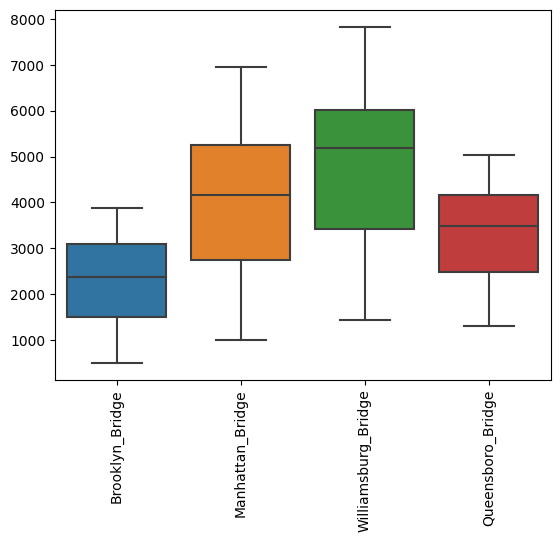

In [47]:
g = sns.boxplot(data = df1[['Brooklyn_Bridge',
       'Manhattan_Bridge', 'Williamsburg_Bridge', 'Queensboro_Bridge']], orient = 'o',  width = 0.8, fliersize = 10)
g.xaxis.set_tick_params(rotation = 90)

* Scalarea prin standardizare a datelor

In [48]:
import scipy.stats as stats

In [49]:
df2= stats.zscore(df1.drop(columns = ['Date']))
df2.sample(5)

High_Temp_C  Low_Temp_C  Precipitation  Brooklyn_Bridge  Manhattan_Bridge  \
28    -0.320887    0.051228      -0.022897         0.107638          0.075539   
26     0.136243    0.051228      -0.513552         1.096504          0.915209   
9     -1.046917   -1.632966      -0.513552        -0.840366         -0.977577   
21     1.570376    1.745947      -0.513552         0.720572          0.504194   
5     -1.396487   -1.727702      -0.513552        -0.392925         -0.423677   

    Williamsburg_Bridge  Queensboro_Bridge     Total  
28             0.105284          -0.004438  0.075505  
26             0.947405           0.943919  0.968250  
9             -0.956209          -1.087753 -0.973470  
21             0.679960           0.464269  0.594413  
5             -0.556146          -0.459467 -0.470761

In [50]:
#df.columns

In [51]:
df2['Date'] = df['Date']

In [52]:
df2.sample(5)

High_Temp_C  Low_Temp_C  Precipitation  Brooklyn_Bridge  Manhattan_Bridge  \
5     -1.396487   -1.727702      -0.513552        -0.392925         -0.423677   
15     0.485813   -0.148770      -0.513552         0.116832          0.156684   
19     0.665079    0.377540      -0.513552         1.205811          1.484397   
4     -1.656424   -2.138224      -0.513552        -0.872034         -0.842336   
17     1.830313    0.588064      -0.513552         1.635886          1.630811   

    Williamsburg_Bridge  Queensboro_Bridge     Total       Date  
5             -0.556146          -0.459467 -0.470761 2016-04-06  
15             0.420803           0.636615  0.331270 2016-04-16  
19             1.534238           1.436335  1.450081 2016-04-20  
4             -0.984391          -0.908112 -0.911374 2016-04-05  
17             1.419855           1.469162  1.539895 2016-04-18

* Analiza corelatiilor

In [53]:
df2.corr()

High_Temp_C  Low_Temp_C  Precipitation  Brooklyn_Bridge  \
High_Temp_C             1.000000    0.823853      -0.345898         0.739377   
Low_Temp_C              0.823853    1.000000      -0.165441         0.464550   
Precipitation          -0.345898   -0.165441       1.000000        -0.599514   
Brooklyn_Bridge         0.739377    0.464550      -0.599514         1.000000   
Manhattan_Bridge        0.720175    0.465097      -0.588419         0.983148   
Williamsburg_Bridge     0.764336    0.534212      -0.576076         0.980463   
Queensboro_Bridge       0.727825    0.475725      -0.596254         0.976991   
Total                   0.743344    0.492124      -0.591079         0.989339   

                     Manhattan_Bridge  Williamsburg_Bridge  Queensboro_Bridge  \
High_Temp_C                  0.720175             0.764336           0.727825   
Low_Temp_C                   0.465097             0.534212           0.475725   
Precipitation               -0.588419            -0.576076          -0.596254   
Brooklyn_Bridge              0.983148             0.980463           0.976991   
Manhattan_Bridge             1.000000             0.989805           0.985867   
Williamsburg_Bridge          0.989805             1.000000           0.988852   
Queensboro_Bridge            0.985867             0.988852           1.000000   
Total                        0.996323             0.996639           0.993391   

                        Total  
High_Temp_C          0.743344  
Low_Temp_C           0.492124  
Precipitation       -0.591079  
Brooklyn_Bridge      0.989339  
Manhattan_Bridge     0.996323  
Williamsburg_Bridge  0.996639  
Queensboro_Bridge    0.993391  
Total                1.000000

<AxesSubplot:>

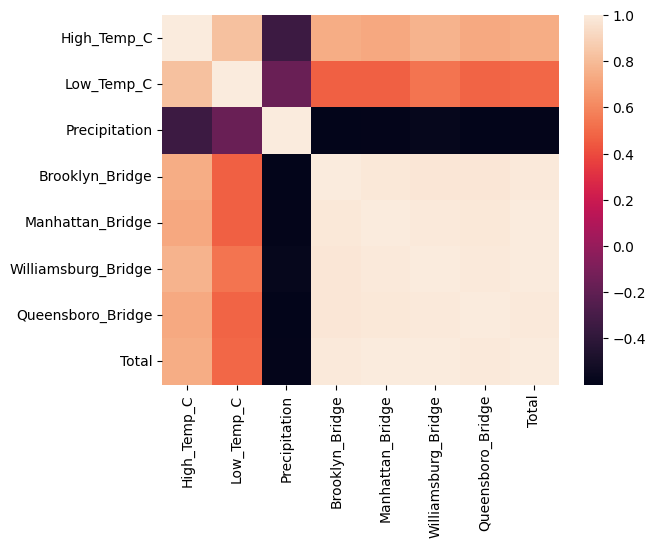

In [54]:
sns.heatmap(df2.corr())

Conform matricei de corelatie reiese ca exista o corelatie pozitiva intre temperatura si numarul de biciclete si o corelatie negativa intre precipitatii si numarul de biciclete. Deoarece această matrice nu confirmă dacă coeficienții de corelație sunt semnificativi din punct de vedere statistic, calculam si p-value ptr care obtinem valori < 0.05 ptr High_Temp_C si Precipitation ceea ce ne confirma ca relația dintre aceste variabile si numarul de biciclete  este semnificativă din punct de vedere statistic.

In [55]:
from scipy.stats import pearsonr
r1, p1 = pearsonr(df2.High_Temp_C, df2.Brooklyn_Bridge)

In [56]:
r1, p1

(0.7393765058774275, 3.0479173897803536e-06)

In [57]:
r2, p2 = pearsonr(df2.High_Temp_C, df2.Brooklyn_Bridge)

In [58]:
list_var_atm = ['High_Temp_C','Low_Temp_C', 'Precipitation']

In [59]:
lista_poduri = ['Brooklyn_Bridge', 'Manhattan_Bridge', 'Williamsburg_Bridge','Queensboro_Bridge']

In [60]:
for atm in list_var_atm:
    for pod in lista_poduri:
        r, p = pearsonr(df2[atm], df2[pod])
        print(f'Ptr.{atm} si {pod} coeficientul de corelatie este {r}, iar p_value este {p}')

Ptr.High_Temp_C si Brooklyn_Bridge coeficientul de corelatie este 0.7393765058774275, iar p_value este 3.0479173897803536e-06
Ptr.High_Temp_C si Manhattan_Bridge coeficientul de corelatie este 0.7201747728770578, iar p_value este 7.2259644785330175e-06
Ptr.High_Temp_C si Williamsburg_Bridge coeficientul de corelatie este 0.7643362883563819, iar p_value este 8.823651373848198e-07
Ptr.High_Temp_C si Queensboro_Bridge coeficientul de corelatie este 0.7278252617145778, iar p_value este 5.1672116979597195e-06
Ptr.Low_Temp_C si Brooklyn_Bridge coeficientul de corelatie este 0.464550105799598, iar p_value este 0.009702000694623738
Ptr.Low_Temp_C si Manhattan_Bridge coeficientul de corelatie este 0.4650974507606391, iar p_value este 0.00960526809055803
Ptr.Low_Temp_C si Williamsburg_Bridge coeficientul de corelatie este 0.5342122560021134, iar p_value este 0.002359530725527543
Ptr.Low_Temp_C si Queensboro_Bridge coeficientul de corelatie este 0.47572477391653817, iar p_value este 0.00788192225

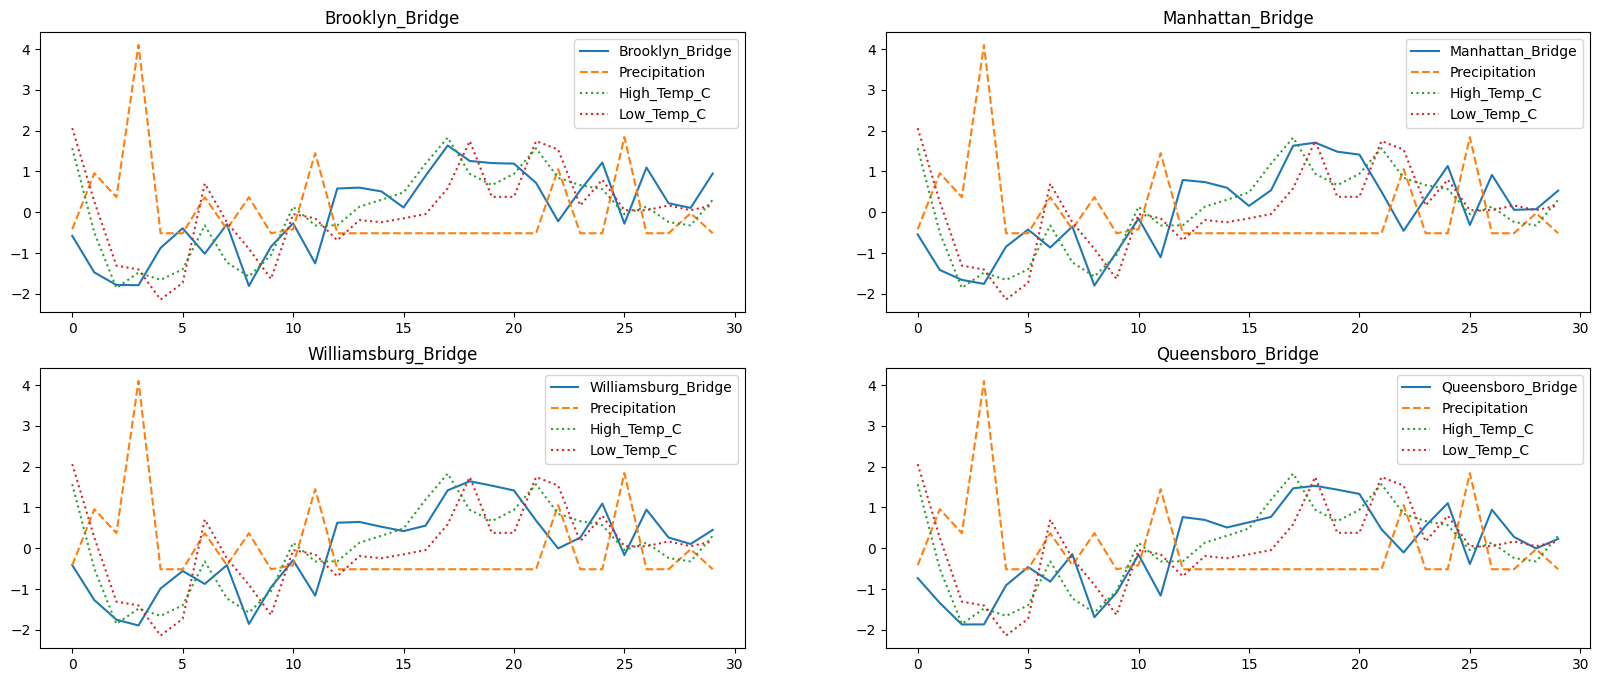

In [61]:
fig, axes = plt.subplots(2,2, figsize=(20,8))

df2.Brooklyn_Bridge.plot(ax= axes[0][0], legend = 'Bridge', title = 'Brooklyn_Bridge')
df2.Precipitation.plot(ax= axes[0][0], legend = 'Prec', linestyle = '--')
df2['High_Temp_C'].plot(ax= axes[0][0], legend = 'T max', linestyle = ':')
df2['Low_Temp_C'].plot(ax= axes[0][0], legend = 'T min', linestyle = ':')
df2.Manhattan_Bridge.plot(ax= axes[0][1], legend = 'Bridge', title = 'Manhattan_Bridge')
df2.Precipitation.plot(ax= axes[0][1], legend = 'Prec',  linestyle = '--')
df2['High_Temp_C'].plot(ax= axes[0][1], legend = 'T max', linestyle = ':')
df2['Low_Temp_C'].plot(ax= axes[0][1], legend = 'T min', linestyle = ':')
df2.Williamsburg_Bridge.plot(ax= axes[1][0], legend = 'Bridge', title = 'Williamsburg_Bridge')
df2.Precipitation.plot(ax= axes[1][0], legend = 'Prec',  linestyle = '--')
df2['High_Temp_C'].plot(ax= axes[1][0], legend = 'T max', linestyle = ':')
df2['Low_Temp_C'].plot(ax= axes[1][0], legend = 'T min', linestyle = ':')
df2.Queensboro_Bridge.plot(ax= axes[1][1], legend = 'Bridge', title = 'Queensboro_Bridge')
df2.Precipitation.plot(ax= axes[1][1], legend = 'Prec',  linestyle = '--')
df2['High_Temp_C'].plot(ax= axes[1][1], legend = 'T max', linestyle = ':')
df2['Low_Temp_C'].plot(ax= axes[1][1], legend = 'T min', linestyle = ':')
plt.show()

* Moving correlation window with 4 steps forward 

In [62]:
Tmax_ver_Brooklyn = df2['High_Temp_C'].rolling(4).corr(df2['Brooklyn_Bridge'])
Tmin_ver_Brooklyn_Bridge = df2['Low_Temp_C'].rolling(4).corr(df2['Brooklyn_Bridge'])
RR_vers_Brooklyn_Bridge = df2['Precipitation'].rolling(4).corr(df2['Brooklyn_Bridge'])

Tmax_ver_Manhattan = df2['High_Temp_C'].rolling(4).corr(df2['Manhattan_Bridge'])
Tmin_ver_Manhattan = df2['Low_Temp_C'].rolling(4).corr(df2['Manhattan_Bridge'])
RR_vers_Manhattan = df2['Precipitation'].rolling(4).corr(df2['Manhattan_Bridge'])

Tmax_ver_Williamsburg = df2['High_Temp_C'].rolling(4).corr(df2['Williamsburg_Bridge'])
Tmin_ver_Williamsburg = df2['Low_Temp_C'].rolling(4).corr(df2['Williamsburg_Bridge'])
RR_vers_Williamsburg = df2['Precipitation'].rolling(4).corr(df2['Williamsburg_Bridge'])

Tmax_ver_Queensboro = df2['High_Temp_C'].rolling(4).corr(df2['Queensboro_Bridge'])
Tmin_ver_Queensboro = df2['Low_Temp_C'].rolling(4).corr(df2['Queensboro_Bridge'])
RR_vers_Queensboro = df2['Precipitation'].rolling(4).corr(df2['Queensboro_Bridge'])

Create an Empty DataFrame object

In [63]:
df_mov_cor = pd.DataFrame()
print(df_mov_cor)

Empty DataFrame
Columns: []
Index: []


Append columns to an empty DataFrame

In [64]:
df_mov_cor ['Tmax_ver_Brooklyn'] = Tmax_ver_Brooklyn
df_mov_cor ['Tmin_ver_Brooklyn_Bridge'] = Tmin_ver_Brooklyn_Bridge
df_mov_cor ['RR_vers_Brooklyn_Bridge'] = RR_vers_Brooklyn_Bridge
df_mov_cor ['Tmax_ver_Manhattan'] = Tmax_ver_Manhattan
df_mov_cor ['Tmin_ver_Manhattan'] = Tmin_ver_Manhattan
df_mov_cor ['RR_vers_Manhattan'] = RR_vers_Manhattan
df_mov_cor ['Tmax_ver_Williamsburg'] = Tmax_ver_Williamsburg
df_mov_cor ['Tmin_ver_Williamsburg'] = Tmin_ver_Williamsburg
df_mov_cor ['RR_vers_Williamsburg'] = RR_vers_Williamsburg
df_mov_cor ['Tmax_ver_Queensboro'] = Tmax_ver_Queensboro
df_mov_cor ['Tmin_ver_Queensboro'] = Tmin_ver_Queensboro
df_mov_cor ['RR_vers_Queensboro'] = RR_vers_Queensboro
df_mov_cor ['Date'] = df['Date']
df_mov_cor.sample(5)

Tmax_ver_Brooklyn  Tmin_ver_Brooklyn_Bridge  RR_vers_Brooklyn_Bridge  \
13           0.329353                 -0.539603                -0.907198   
11           0.787761                  0.245118                -0.571467   
27           0.760098                  0.583105                -0.784395   
9            0.290025                  0.162088                -0.746461   
5            0.523676                 -0.726846                -0.694251   

    Tmax_ver_Manhattan  Tmin_ver_Manhattan  RR_vers_Manhattan  \
13            0.290457           -0.573650          -0.896493   
11            0.885680            0.425886          -0.434552   
27            0.814434            0.631222          -0.738389   
9             0.424387            0.348555          -0.604551   
5             0.471807           -0.730724          -0.736798   

    Tmax_ver_Williamsburg  Tmin_ver_Williamsburg  RR_vers_Williamsburg  \
13               0.297186              -0.561765             -0.885243   
11               0.862145               0.355861             -0.460223   
27               0.768663               0.608779             -0.789939   
9                0.459536               0.328930             -0.617731   
5                0.453006              -0.718539             -0.753267   

    Tmax_ver_Queensboro  Tmin_ver_Queensboro  RR_vers_Queensboro       Date  
13             0.299183            -0.569234           -0.906481 2016-04-14  
11             0.881052             0.484741           -0.443762 2016-04-12  
27             0.711235             0.598153           -0.851235 2016-04-28  
9              0.337093             0.428425           -0.522056 2016-04-10  
5              0.516845            -0.743308           -0.696498 2016-04-06

In [65]:
df_mov_cor.columns

Index(['Tmax_ver_Brooklyn', 'Tmin_ver_Brooklyn_Bridge',
       'RR_vers_Brooklyn_Bridge', 'Tmax_ver_Manhattan', 'Tmin_ver_Manhattan',
       'RR_vers_Manhattan', 'Tmax_ver_Williamsburg', 'Tmin_ver_Williamsburg',
       'RR_vers_Williamsburg', 'Tmax_ver_Queensboro', 'Tmin_ver_Queensboro',
       'RR_vers_Queensboro', 'Date'],
      dtype='object')

Plot mobile correlation

In [66]:
Tmax_ver_Brooklyn = df2['High_Temp_C'].rolling(4).corr(df2['Brooklyn_Bridge'])
Tmin_ver_Brooklyn_Bridge = df2['Low_Temp_C'].rolling(4).corr(df2['Brooklyn_Bridge'])
RR_vers_Brooklyn_Bridge = df2['Precipitation'].rolling(4).corr(df2['Brooklyn_Bridge'])

Tmax_ver_Manhattan = df2['High_Temp_C'].rolling(4).corr(df2['Manhattan_Bridge'])
Tmin_ver_Manhattan = df2['Low_Temp_C'].rolling(4).corr(df2['Manhattan_Bridge'])
RR_vers_Manhattan = df2['Precipitation'].rolling(4).corr(df2['Manhattan_Bridge'])

Tmax_ver_Williamsburg = df2['High_Temp_C'].rolling(4).corr(df2['Williamsburg_Bridge'])
Tmin_ver_Williamsburg = df2['Low_Temp_C'].rolling(4).corr(df2['Williamsburg_Bridge'])
RR_vers_Williamsburg = df2['Precipitation'].rolling(4).corr(df2['Williamsburg_Bridge'])

Tmax_ver_Queensboro = df2['High_Temp_C'].rolling(4).corr(df2['Queensboro_Bridge'])
Tmin_ver_Queensboro = df2['Low_Temp_C'].rolling(4).corr(df2['Queensboro_Bridge'])
RR_vers_Queensboro = df2['Precipitation'].rolling(4).corr(df2['Queensboro_Bridge'])

Create an Empty DataFrame object

In [67]:
df_mov_cor = pd.DataFrame()
print(df_mov_cor)

Empty DataFrame
Columns: []
Index: []


Append columns to an empty DataFrame

In [68]:
df_mov_cor ['Tmax_ver_Brooklyn'] = Tmax_ver_Brooklyn
df_mov_cor ['Tmin_ver_Brooklyn_Bridge'] = Tmin_ver_Brooklyn_Bridge
df_mov_cor ['RR_vers_Brooklyn_Bridge'] = RR_vers_Brooklyn_Bridge
df_mov_cor ['Tmax_ver_Manhattan'] = Tmax_ver_Manhattan
df_mov_cor ['Tmin_ver_Manhattan'] = Tmin_ver_Manhattan
df_mov_cor ['RR_vers_Manhattan'] = RR_vers_Manhattan
df_mov_cor ['Tmax_ver_Williamsburg'] = Tmax_ver_Williamsburg
df_mov_cor ['Tmin_ver_Williamsburg'] = Tmin_ver_Williamsburg
df_mov_cor ['RR_vers_Williamsburg'] = RR_vers_Williamsburg
df_mov_cor ['Tmax_ver_Queensboro'] = Tmax_ver_Queensboro
df_mov_cor ['Tmin_ver_Queensboro'] = Tmin_ver_Queensboro
df_mov_cor ['RR_vers_Queensboro'] = RR_vers_Queensboro
df_mov_cor ['Date'] = df['Date']
df_mov_cor.sample(10) 

Tmax_ver_Brooklyn  Tmin_ver_Brooklyn_Bridge  RR_vers_Brooklyn_Bridge  \
4            0.012682                 -0.359367                -0.649703   
5            0.523676                 -0.726846                -0.694251   
11           0.787761                  0.245118                -0.571467   
15          -0.705102                 -0.476209                      NaN   
18           0.878718                  0.597141                      NaN   
1                 NaN                       NaN                      NaN   
23           0.265152                 -0.479160                -0.883544   
17           0.930410                  0.905661                      NaN   
22          -0.054716                 -0.746003                -0.941407   
16           0.527102                  0.455376                      NaN   

    Tmax_ver_Manhattan  Tmin_ver_Manhattan  RR_vers_Manhattan  \
4            -0.012682           -0.355849          -0.716347   
5             0.471807           -0.730724          -0.736798   
11            0.885680            0.425886          -0.434552   
15           -0.802620           -0.591132                NaN   
18            0.629258            0.851670                NaN   
1                  NaN                 NaN                NaN   
23            0.165059           -0.524019          -0.791358   
17            0.829321            0.920806                NaN   
22           -0.219491           -0.845863          -0.871887   
16           -0.215956           -0.238021                NaN   

    Tmax_ver_Williamsburg  Tmin_ver_Williamsburg  RR_vers_Williamsburg  \
4                0.284384              -0.036875             -0.736938   
5                0.453006              -0.718539             -0.753267   
11               0.862145               0.355861             -0.460223   
15              -0.784679              -0.511540                   NaN   
18               0.504817               0.910436                   NaN   
1                     NaN                    NaN                   NaN   
23               0.282529              -0.330784             -0.637048   
17               0.864360               0.974643                   NaN   
22              -0.268728              -0.866255             -0.848804   
16              -0.179993              -0.072040                   NaN   

    Tmax_ver_Queensboro  Tmin_ver_Queensboro  RR_vers_Queensboro       Date  
4              0.223330            -0.148947           -0.648494 2016-04-05  
5              0.516845            -0.743308           -0.696498 2016-04-06  
11             0.881052             0.484741           -0.443762 2016-04-12  
15            -0.724138            -0.611481                 NaN 2016-04-16  
18             0.583356             0.866512                 NaN 2016-04-19  
1                   NaN                  NaN                 NaN 2016-04-02  
23             0.011105            -0.635413           -0.750604 2016-04-24  
17             0.939169             0.999513                 NaN 2016-04-18  
22            -0.339060            -0.903457           -0.804761 2016-04-23  
16             0.612306             0.862032                 NaN 2016-04-17

In [69]:
df_mov_cor.columns

Index(['Tmax_ver_Brooklyn', 'Tmin_ver_Brooklyn_Bridge',
       'RR_vers_Brooklyn_Bridge', 'Tmax_ver_Manhattan', 'Tmin_ver_Manhattan',
       'RR_vers_Manhattan', 'Tmax_ver_Williamsburg', 'Tmin_ver_Williamsburg',
       'RR_vers_Williamsburg', 'Tmax_ver_Queensboro', 'Tmin_ver_Queensboro',
       'RR_vers_Queensboro', 'Date'],
      dtype='object')

Plot mobile correlation

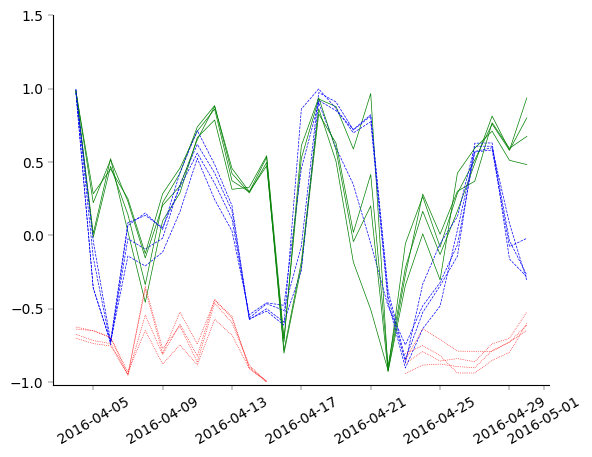

In [70]:
fig, ax = plt.subplots()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_tick_params(width=0.3, colors='black')
ax.yaxis.set_tick_params(width=0.3, colors='black')
plt.rcParams['axes.linewidth'] = 0.3

plt.plot('Date', 'Tmax_ver_Brooklyn', data=df_mov_cor, label ='Tmax_ver_Brooklyn', linewidth=0.5, color='g', linestyle='solid')
plt.plot('Date', 'Tmin_ver_Brooklyn_Bridge', data=df_mov_cor, label ='Tmin_ver_Brooklyn_Bridge', linewidth=0.5, color='b', linestyle='dashed')
plt.plot('Date', 'RR_vers_Brooklyn_Bridge', data=df_mov_cor, label ='RR_vers_Brooklyn_Bridge', linewidth=0.5, color='r', linestyle='dotted')

plt.plot('Date', 'Tmax_ver_Manhattan', data=df_mov_cor, label ='Tmax_ver_Manhattan', linewidth=0.5, color='g', linestyle='solid')
plt.plot('Date', 'Tmin_ver_Manhattan', data=df_mov_cor, label ='Tmin_ver_Manhattan', linewidth=0.5, color='b', linestyle='dashed')
plt.plot('Date', 'RR_vers_Manhattan', data=df_mov_cor, label ='RR_vers_Manhattan', linewidth=0.5, color='r', linestyle='dotted')

plt.plot('Date', 'Tmax_ver_Williamsburg', data=df_mov_cor, label ='Tmax_ver_Williamsburg', linewidth=0.5, color='g', linestyle='solid')
plt.plot('Date', 'Tmin_ver_Williamsburg', data=df_mov_cor, label ='Tmin_ver_Williamsburg', linewidth=0.5, color='b', linestyle='dashed')
plt.plot('Date', 'RR_vers_Williamsburg', data=df_mov_cor, label ='RR_vers_Williamsburg', linewidth=0.5, color='r', linestyle='dotted')

plt.plot('Date', 'Tmax_ver_Queensboro', data=df_mov_cor, label ='Tmax_ver_Queensboro', linewidth=0.5, color='g', linestyle='solid')
plt.plot('Date', 'Tmin_ver_Queensboro', data=df_mov_cor, label ='Tmin_ver_Queensbor', linewidth=0.5, color='b', linestyle='dashed')
plt.plot('Date', 'RR_vers_Queensboro', data=df_mov_cor, label ='RR_vers_Queensboro', linewidth=0.5, color='r', linestyle='dotted')
plt.ylim(-1.02,1.5)
plt.xticks(rotation=30)

plt.show()

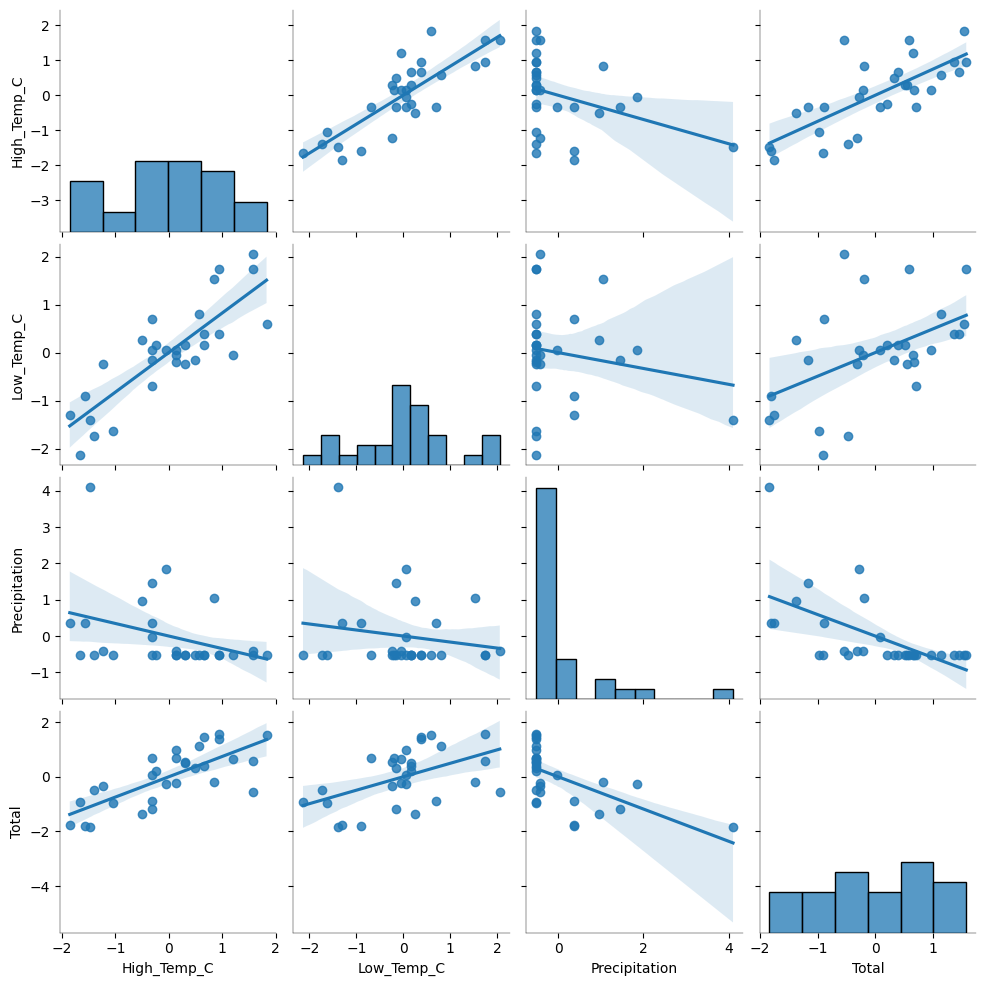

In [71]:
sns.pairplot(df2[['High_Temp_C', 'Low_Temp_C', 'Precipitation', 'Total']], kind="reg")

* Multivariable linear regression

In [72]:
X = df2[['High_Temp_C', 'Low_Temp_C', 'Precipitation']]
y = df2['Total']
X.shape, y.shape

((30, 3), (30,))

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [74]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [75]:
y_pred_train = lin_reg.predict(X_train)  
y_pred_test = lin_reg.predict(X_test)  

In [76]:
print('R2_score for train data is:' + '{:.2}'.format(r2_score(y_train, y_pred_train)))
print("MSE score for train set: " +"{:.2}".format(mean_squared_error(y_train, y_pred_train)))
print('R2_score for test data is:' + '{:.2}'.format(r2_score(y_test, y_pred_test)))
print("MSE score for test set: " +"{:.2}".format(mean_squared_error(y_test, y_pred_test)))

R2_score for train data is:0.66
MSE score for train set: 0.32
R2_score for test data is:0.76
MSE score for test set: 0.28


* Polynomial regression

In [77]:
poly_reg = PolynomialFeatures(degree = 5)
transform_poly_train = poly_reg.fit_transform(X_train)

regpoly1 = LinearRegression()
regpoly1.fit(transform_poly_train, y_train)

LinearRegression()

In [78]:
transform_poly_test = poly_reg.fit_transform(X_test)
polynomial_predict_test = regpoly1.predict(transform_poly_test)

In [79]:
print("R2 Score for Test set: " +"{:.2}".format(r2_score(y_test, polynomial_predict_test)))
print("MSE Score for Test set: " +"{:.2}".format(mean_squared_error(y_test, polynomial_predict_test)))

R2 Score for Test set: -1.4e+03
MSE Score for Test set: 1.6e+03


* Decision Tree Regressor

In [80]:
decision_tree= tree.DecisionTreeRegressor(min_samples_split = 5)
decision_tree.fit(X_train, y_train)
y_predict = decision_tree.predict(X_test)

In [81]:
print("R2 Score for Test set: " +"{:.2}".format(r2_score(y_test, y_predict)))
print("MSE Score for Test set: " +"{:.2}".format(mean_squared_error(y_test, y_predict)))

R2 Score for Test set: 0.79
MSE Score for Test set: 0.23


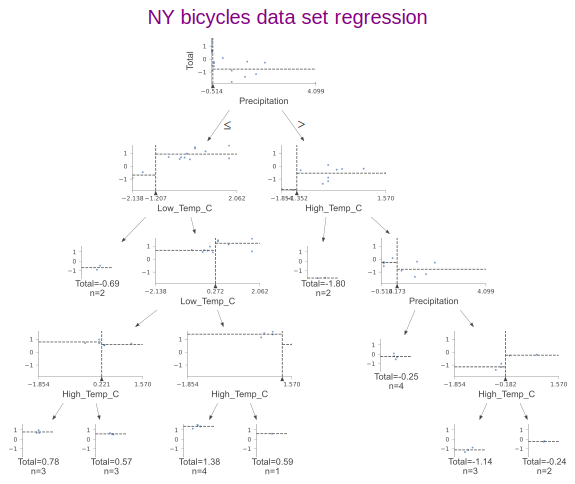

In [82]:
vizd = dtreeviz(decision_tree,
               X_train,
               y_train,
               target_name = 'Total',  # this name will be displayed at the leaf node
               feature_names=['High_Temp_C', 'Low_Temp_C', 'Precipitation'],
               title="NY bicycles data set regression",
               fontname="Arial",
               title_fontsize=20,
               colors = {"title":"purple"}
              )
vizd

*  Random Forest Regressor ptr df2 - dupa scalarea datelor

In [83]:
params = {'max_leaf_nodes':  list(range(2, 20)), 'min_samples_split': list(range(2, 100))}
grid_search_cv = GridSearchCV(tree.DecisionTreeRegressor(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 1764 candidates, totalling 5292 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18, 19,
                                               20, 21, 22, 23, 24, 25, 26, 27,
                                               28, 29, 30, 31, ...]},
             verbose=1)

In [84]:
grid_search_cv.best_estimator_

DecisionTreeRegressor(max_leaf_nodes=6, min_samples_split=5, random_state=42)

In [85]:
forest = RandomForestRegressor(n_estimators = 500,
                               min_samples_split=5,
                               max_leaf_nodes=6,
                               criterion = 'squared_error',
                               random_state = 42,
                               n_jobs = -1)
forest.fit(X_train,y_train)
forest_train_pred = forest.predict(X_train)
forest_test_pred = forest.predict(X_test)


In [86]:
print("R2 Score for Train set: " +"{:.2}".format(r2_score(y_train, forest_train_pred)))
print("MSE Score for Train set: " +"{:.2}".format(mean_squared_error(y_train, forest_train_pred)))
print("R2 Score for Test set: " +"{:.2}".format(r2_score(y_test, forest_test_pred)))
print("MSE Score for Test set: " +"{:.2}".format(mean_squared_error(y_test, forest_test_pred)))

R2 Score for Train set: 0.91
MSE Score for Train set: 0.086
R2 Score for Test set: 0.84
MSE Score for Test set: 0.19


*  Random Forest Regressor ptr df1 - fara scalarea datelor

In [87]:
df1.sample(5)

Date  High_Temp_C  Low_Temp_C  Precipitation  Brooklyn_Bridge  \
8  2016-04-09     6.111111    3.277778           0.09              504   
4  2016-04-05     5.611111   -3.277778           0.00             1416   
6  2016-04-07    13.888889   11.722222           0.09             1276   
22 2016-04-23    21.111111   16.111111           0.16             2055   
7  2016-04-08     8.277778    6.722222           0.01             1982   

    Manhattan_Bridge  Williamsburg_Bridge  Queensboro_Bridge  Total  
8                997                 1507               1502   4510  
4               2617                 3081               2357   9471  
6               2581                 3282               2457   9596  
22              3276                 4856               3239  13426  
7               3455                 4113               3194  12744

In [88]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 30 non-null     datetime64[ns]
 1   High_Temp_C          30 non-null     float64       
 2   Low_Temp_C           30 non-null     float64       
 3   Precipitation        30 non-null     float64       
 4   Brooklyn_Bridge      30 non-null     int64         
 5   Manhattan_Bridge     30 non-null     int64         
 6   Williamsburg_Bridge  30 non-null     int64         
 7   Queensboro_Bridge    30 non-null     int64         
 8   Total                30 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 3.4 KB


In [89]:
X1 = df1[['High_Temp_C', 'Low_Temp_C', 'Precipitation']]
y1 = df1[['Total']]
X1.shape, y1.shape

((30, 3), (30, 1))

In [90]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.20, random_state = 42)

In [91]:
forest1 = RandomForestRegressor(n_estimators = 100,
                               min_samples_split=5,
                               max_leaf_nodes=6,
                               criterion = 'squared_error',
                               random_state = 42,
                               n_jobs = -1)
forest1.fit(X1_train,y1_train)
forest_train_pred1 = forest1.predict(X1_train)
forest_test_pred1 = forest1.predict(X1_test)

In [92]:
print("R2 Score for Train set: " +"{:.2}".format(r2_score(y1_train, forest_train_pred1)))
print("MSE Score for Train set: " +"{:.2}".format(mean_squared_error(y1_train, forest_train_pred1)))
print("R2 Score for Test set: " +"{:.2}".format(r2_score(y1_test, forest_test_pred1)))
print("MSE Score for Test set: " +"{:.2}".format(mean_squared_error(y1_test, forest_test_pred1)))

R2 Score for Train set: 0.91
MSE Score for Train set: 2.7e+06
R2 Score for Test set: 0.85
MSE Score for Test set: 5.3e+06


Dupa ce am evaluat cele 4 modele am ajuns la concluzia ca cel mai bun pentru prezicerea datelor este Random Forest Regressor deoarece are cel mai mare R2 score si cea mai mica valoare MSE.

* Prezicerea numerelor de biciclete care intră sau ies din Manhattan printr-unul dintre podurile East River ptr data de 3 11 2022.
Prognoza meteo: 'High_Temp_C' = 18 , 'Low_Temp_C' = 11 , 'Precipitation' = 0

In [93]:
predict_data = pd.DataFrame([[18, 11, 0]], columns = ['High_Temp_C', 'Low_Temp_C', 'Precipitation'])

In [94]:
predict_data.shape

(1, 3)

In [95]:
predict_data

High_Temp_C  Low_Temp_C  Precipitation
0           18          11              0

In [96]:
X_train.shape

(24, 3)

In [97]:
predict_data_poly = poly_reg.transform(predict_data)

In [98]:
predict_data_poly

array([[1.000000e+00, 1.800000e+01, 1.100000e+01, 0.000000e+00,
        3.240000e+02, 1.980000e+02, 0.000000e+00, 1.210000e+02,
        0.000000e+00, 0.000000e+00, 5.832000e+03, 3.564000e+03,
        0.000000e+00, 2.178000e+03, 0.000000e+00, 0.000000e+00,
        1.331000e+03, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.049760e+05, 6.415200e+04, 0.000000e+00, 3.920400e+04,
        0.000000e+00, 0.000000e+00, 2.395800e+04, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 1.464100e+04, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.889568e+06,
        1.154736e+06, 0.000000e+00, 7.056720e+05, 0.000000e+00,
        0.000000e+00, 4.312440e+05, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 2.635380e+05, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 1.610510e+05, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00]])

In [99]:
regpoly1.predict(predict_data_poly)

array([-10359537.17685579])

In [100]:
forest1.predict(predict_data)

array([20879.9053254])

* Verificarea corelatiei existente intre numarul de bicicle care traverseaza podul Queensboro_Bridge si numarul de biciclete care traverseaza celelalte poduri.

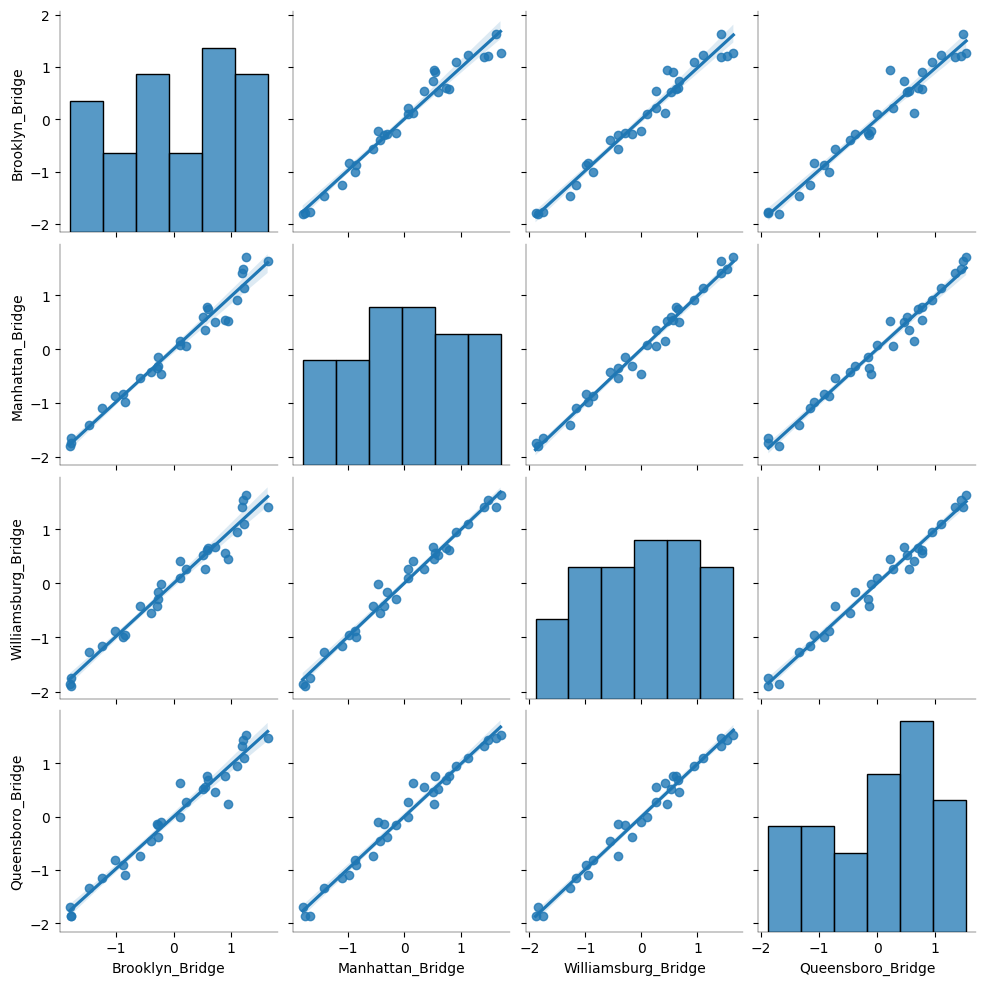

In [101]:
sns.pairplot(df2[['Brooklyn_Bridge','Manhattan_Bridge', 'Williamsburg_Bridge', 'Queensboro_Bridge']], kind="reg")

In [102]:
X2 = df2[['Brooklyn_Bridge','Manhattan_Bridge', 'Williamsburg_Bridge']] #independent variable array
y2 = df2[['Queensboro_Bridge']] #dependent variable vector

In [103]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
X.shape, y.shape

((30, 3), (30,))

In [104]:
lin_df = LinearRegression()  
lin_df.fit(X2_train, y2_train)

LinearRegression()

In [105]:
y_pred_train = lin_df.predict(X2_train)
rmse = np.sqrt(mean_squared_error(y2_train, lin_df.predict(X2_train)))
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.3}".format(r2_score(y2_train, y_pred_train)))

RMSE Score for Test set: 0.12
R2 Score for Test set: 0.985


In [106]:
y_pred_test = lin_df.predict(X2_test)

In [107]:
accuracy_score = lin_df.score(X2_test, y_pred_test)
print("Linear Regression Model Accuracy Score: " + "{:.1%}".format(accuracy_score))
from sklearn.metrics import mean_squared_error,r2_score
print("R2 Score: " +"{:.3}".format(r2_score(y2_test, y_pred_test)))

Linear Regression Model Accuracy Score: 100.0%
R2 Score: 0.961
